<a href="https://colab.research.google.com/github/null32/ML1/blob/master/prac/colab_copy/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Непараметрическая регрессия. Формула Надарая – Ватсона

Продемонстрирован алгоритм регрессии с использованием форулы Надарая-Ватсона.

Использованы два ядра: Гаусово и квартическое.

При использовании квартического ядра средняя квадратическая ошибка меньше, чем при использовании Гаус


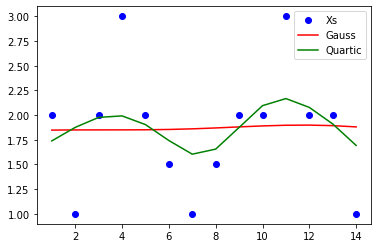

Gauss error: 5.154682455782671, Quartic error: 3.5220328925822195


In [ ]:
#!/usr/bin/env python3

import math # math.pi, ...
import matplotlib.pyplot as plt # visualization

def metricDef(x1, x2):
	return abs(x1 - x2)

def kernelGauss(x):
	#return 1 / (2 * math.pi) * math.exp(x * x * (-0.5))
	return math.exp(x * x * (-0.5))

def kernelQuartic(x):
	return math.pow(1 - x*x, 2) * (1 if abs(x) < 1 else 0)

def sse(Y, A):
	assert len(Y) == len(A)
	res = 0
	for i in range(len(Y)):
		res += (Y[i] - A[i]) ** 2
	return res

def NadarayaVatsona(X, Y, kernelFunc, metric, h):
	assert len(X) == len(Y)
	l = len(X)
	res = []
	for xi in X:
		nom = 0
		denom = 0
		for i in range(l):
			k = kernelFunc(metric(xi, X[i]) / h)
			nom += Y[i] * k
			denom += + k
		res.append(nom / denom)
	return res

def main():
	X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
	Y = [2, 1, 2, 3, 2, 1.5, 1, 1.5, 2, 2,  3,  2,  2,  1]

	resG = NadarayaVatsona(X, Y, kernelGauss, metricDef, 4)
	resQ = NadarayaVatsona(X, Y, kernelQuartic, metricDef, 4)
	
	plt.plot(X, Y, 'bo', label = 'Xs')
	plt.plot(X, resG, 'r', label = 'Gauss')
	plt.plot(X, resQ, 'g', label = 'Quartic')
	plt.legend(loc = 'upper right')
	plt.show()

	errG = sse(Y, resG)
	errQ = sse(Y, resQ)

	print(f"Gauss error: {errG}, Quartic error: {errQ}")

if __name__ == '__main__':
	main()

# Метод Lowess для непараметрической регрессии


Реализован алгоритм lowess для непараметрической регрессии
```
lowess(X, Y, kernelFunc, metric, h, smoothKernelFunc, iterCount)
```
X -- объекты,
Y -- ответы,
kernelFunc -- функция ядра,
h -- величина окна,
smoothKernelFunc -- функция ядра для сглаживания,
iterCount -- количество итераций

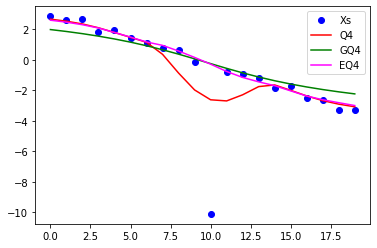

Q4 err: 67.9776440198284
GQ4 err: 103.64121757937352
EQ4 err: 97.19552440232115


In [ ]:
#!/usr/bin/env python3

import math # math.pi, ...
import matplotlib.pyplot as plt # visualization
import random # random
import statistics

def metricDef(x1, x2):
	return abs(x1 - x2)

def kernelGauss(x):
	#return 1 / (2 * math.pi) * math.exp(x * x * (-0.5))
	return math.exp(x * x * (-0.5))

def kernelQuartic(x):
	return math.pow(1 - x*x, 2) if abs(x) < 1 else 0

def kernelEpach(x):
	return 3./4*(1 - x*x) if abs(x) < 1 else 0

def sse(Y, A):
	assert len(Y) == len(A)
	res = 0
	for i in range(len(Y)):
		res += (Y[i] - A[i]) ** 2
	return res

def NadarayaVatsona(X, Y, kernelFunc, metric, h):
	assert len(X) == len(Y)
	l = len(X)
	res = []
	for xi in X:
		nom = 0
		denom = 0
		for i in range(l):
			k = kernelFunc(metric(xi, X[i]) / h)
			nom += Y[i] * k
			denom += k
		res.append(nom / denom)
	return res

def lowess(X, Y, kernelFunc, metric, h, smoothKernelFunc, iterCount = 3):
	assert len(X) == len(Y)
	l = len(X)
	smoothing = [1] * l
	res = []

	# iteration count
	for _ in range(iterCount):
		res = []
		for i in range(l):
			nom = 0
			denom = 0
			for j in range(l):
				k = kernelFunc(metric(X[i], X[j]) / h)
				nom += Y[j] * k * smoothing[j]
				denom += k * smoothing[j]
			res.append(nom / denom)

		newErr = []
		for i in range(l):
			nom = 0
			denom = 0
			for j in range(l):
				if i == j:
					continue
				k = kernelFunc(metric(X[i], X[j]) / h)
				nom += Y[j] * k * smoothing[j]
				denom += k * smoothing[j]
			err = abs((nom / denom) - Y[i])
			newErr.append(err)

		newSmoothing = [(smoothKernelFunc(newErr[i] / 6 / statistics.median(newErr))) for i in range(l)]
		smoothing = newSmoothing
	return res

def main():
	l = 20
	f = lambda x: 3 - x / 3
	coef = [0] * l
	coef[10] = - 10 # выброс
	X = list(range(0, l))
	Y = [f(X[i] + random.random() * 2 - 1) + coef[i] for i in range(l)]

	resQ4 = NadarayaVatsona(X, Y, kernelQuartic, metricDef, 4)

	resGQ4 = lowess(X, Y, kernelGauss, metricDef, 4, kernelQuartic)
	resEQ4 = lowess(X, Y, kernelEpach, metricDef, 4, kernelQuartic)
	
	plt.plot(X, Y, 'bo', label = 'Xs')
	plt.plot(X, resQ4, color = "red", label = "Q4")
	plt.plot(X, resGQ4, color = "green", label = "GQ4")
	plt.plot(X, resEQ4, color = "magenta", label = "EQ4")
	plt.legend(loc = 'upper right')
	plt.show()

	print(f"Q4 err: {sse(Y, resQ4)}")
	print(f"GQ4 err: {sse(Y, resGQ4)}")
	print(f"EQ4 err: {sse(Y, resEQ4)}")

if __name__ == '__main__':
	main()

# Линейная регрессия
Реализовано решение нормальной системы для задачи наименьших квадратов.
Для демонстрации работы используются реальные данные качества вин. ([источник](https://archive.ics.uci.edu/ml/datasets/Wine+Quality))

Продемонстрирована работа алгоритма с 11 характеристиками объекта и с 2.
Сжатие характеристик осуществляется при помощи Метода Главных Компонент (PCA).

Данные после сжатия визуализированы в двухмерном пространстве.

Посчитана средняя ошибка для 11 и 2 характеристик.

Качество при 11 заметно лучше, чем при 2.

Regression function with 11 variables:
	 y = x1 * 0.004 + x2 * -1.100 + x3 * -0.184 + x4 * 0.007 + x5 * -1.911 + x6 * 0.005 + x7 * -0.003 + x8 * 4.529 + x9 * -0.523 + x10 * 0.887 + x11 * 0.297
Regression function with 2 variables:
	 y = x1 * 0.785 + x2 * -1.654
Average error for
	11 vars: 0.5009465274943823
	for 2 vars: 1.5731834331439125


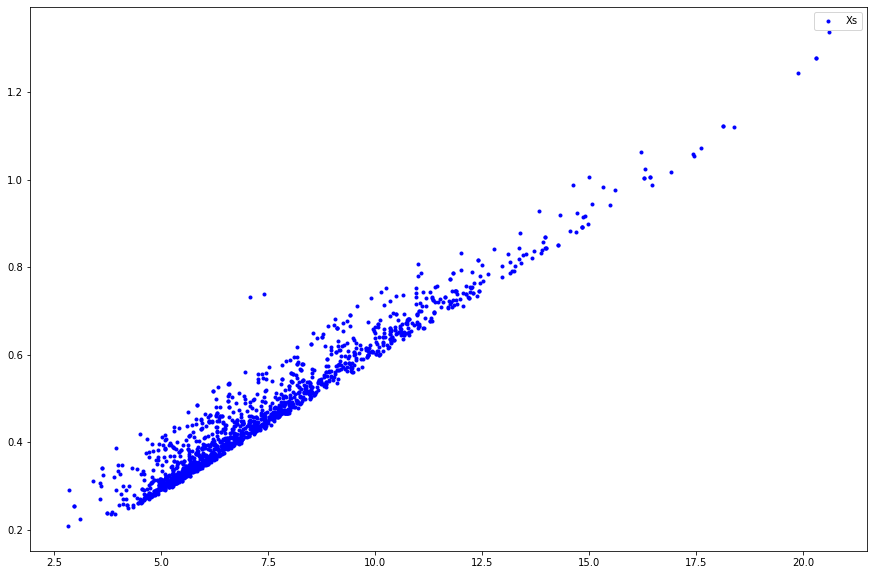

In [3]:
#!/usr/bin/env python3

import csv
import itertools as it
import os
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def main():
    # data_path = 'winequality-white.csv'
    data_path = 'winequality-red.csv'
    data_file = open(data_path,'r')
    data_reader = csv.reader(data_file, delimiter=';')

    header = data_reader.__next__()
    wine_data = list(map(lambda c: [float(e) for e in c], data_reader))
    data_file.close()

    X = np.array(list(map(lambda c: c[:-1], wine_data)))
    Y = np.array(list(map(lambda c: c[-1], wine_data)))
    # print('header: ', header)
    coefs_big = solve_system(X, Y)
    smallerX = PCA(X, n=2)
    coefs_small = solve_system(smallerX, Y)
    print("Regression function with 11 variables:\n\t", pretty_function(coefs_big))
    print("Regression function with 2 variables:\n\t", pretty_function(coefs_small))
    err_big = quality(X, Y, coefs_big)
    err_small = quality(smallerX, Y, coefs_small)
    print(f"Average error for\n\t11 vars: {err_big}\n\tfor 2 vars: {err_small}")
    visualize(smallerX)

def quality(X, Y, a):
    assert X.shape[0] == len(Y)
    assert X.shape[1] == len(a)
    n = len(Y)

    err = 0.0
    for i in range(n):
        err += abs(np.dot(X[i], a) - Y[i])
    
    return err / n

def PCA(X, n=2):
    V, D, U = np.linalg.svd(X, full_matrices=False)
    left = np.matmul(V[:, 0:n], np.diag(D[0:n]))
    res = np.matmul(left, U[0:n, 0:n])

    return res

def visualize(X):
    plt.figure(figsize=(15, 10))
    plt.plot(X[:, 0], X[:, 1], '.', color = '#0000FF', label = 'Xs')
    plt.legend(loc = 'upper right')
    plt.show()

def pretty_function(coefs):
    res = 'y = '
    res += ' + '.join([f'x{i+1} * {coefs[i]:.3f}' for i in range(len(coefs))])
    return res

def solve_system(X, Y):
    res = np.linalg.lstsq(X, Y, rcond=None)
    coefs = res[0]

    return coefs

if __name__ == "__main__":
    main()
